In [346]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [347]:
# Define parameters
L = 4          # Length of the spatial domain
T = 5         # Total time to compute
dx = 0.25        # Spatial step size (delta x)
dt = 0.22        # Time step size (delta t)
alpha = 1/16  
# Stability condition
r = alpha * dt / (2 * dx**2)
print(f'r = {r}') 

r = 0.11


In [348]:
# Discretization on x and t
Nx = int(L / dx)  # Number of points along x
Nt = int(T / dt)  # Number of points along t
print('Number of discretization on x:', Nx)
print('Number of discretization on t:', Nt)

Number of discretization on x: 16
Number of discretization on t: 22


In [349]:
# Boundary conditions
u0, u4 = 0, 8  # u(0, t) and u(4, t)

# Initial condition
x = np.linspace(0, L, Nx + 1)
u_initial = 0.5 * x * (8 - x)

# Solution initialization
u = np.zeros((Nx + 1, Nt + 1))
u[:, 0] = u_initial

In [350]:
# Matrix setup for Crank-Nicolson
A = np.zeros((Nx + 1, Nx + 1))
B = np.zeros((Nx + 1, Nx + 1))

In [351]:
# Filling the matrices A and B for Crank-Nicolson scheme
for i in range(1, Nx):
    A[i, i - 1] = -r
    A[i, i] = 1 + 2 * r
    A[i, i + 1] = -r
    B[i, i - 1] = r
    B[i, i] = 1 - 2 * r
    B[i, i + 1] = r

In [352]:
# Enforce boundary conditions directly in the matrices
A[0, 0] = 1
A[0, 1] = 0
B[0, 0] = 1
B[0, 1] = 0
u[0, :] = u0  # Enforce u(0, t) = 0

A[-1, -1] = 1
A[-1, -2] = 0
B[-1, -1] = 1
B[-1, -2] = 0
u[-1, :] = u4  # Enforce u(4, t) = 8

In [353]:
# Time-stepping using the Crank-Nicolson method
for m in range(0, Nt):
    # Right-hand side calculation with B matrix
    b = B @ u[:, m]

    # Solve the linear system A * u_next = b
    u[:, m + 1] = np.linalg.solve(A, b)


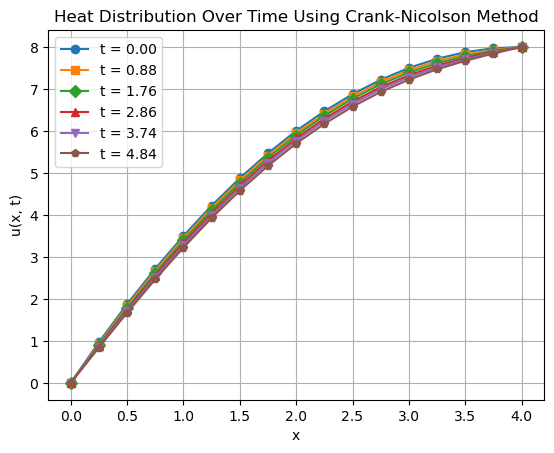

In [355]:
# Plotting u(x, t) for different time steps
time_steps_to_plot = np.linspace(0, Nt, min(6, Nt + 1), dtype=int)  # Dynamically select time steps
markers = ['o', 's', 'D', '^', 'v', 'p']
x_vals = np.linspace(0, L, Nx + 1)

plt.figure()
for idx, m in enumerate(time_steps_to_plot):
    plt.plot(x_vals, u[:, m], marker=markers[idx], label=f't = {m * dt:.2f}')

plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title('Heat Distribution Over Time Using Crank-Nicolson Method')
plt.legend()
plt.grid(True)
plt.show()